<h1><b>GENERATOR FOR BALANCED PAIRS<b><h1>

<h4>This notebook depicts subsampling the images, splitting them into training, validation and test, and mainly generating balanced pairs of images<h4>

Importing relevant libraries

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_columns', 50)

Importing a costume created module by Petr Nguyen

In [2]:
import src_PN.PN_functions as PN

Creating paths for saving generated data frames

In [3]:
if not os.path.exists('./csv/'):
    os.makedirs('./csv/')

Parameters' initialization

In [4]:
random_seed = 1234
total_num_pairs = 21000
test_num_pairs = 1000
train_num_pairs = int((total_num_pairs - test_num_pairs)*0.7)
valid_num_pairs = int((total_num_pairs - test_num_pairs)*0.3)

Reading and subsampling the images

In [5]:
identity_filtered, atts = PN.images_subsampling()

In [6]:
identity_filtered

,image,image_id
5,000006.jpg,4153
9,000010.jpg,612
23,000024.jpg,9290
25,000026.jpg,10046
31,000032.jpg,268
...,...,...
202530,202531.jpg,9768
202548,202549.jpg,6219
202571,202572.jpg,5260
202575,202576.jpg,5471


In [7]:
atts

,image,w5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
5,000006.jpg,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1
9,000010.jpg,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
23,000024.jpg,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1
25,000026.jpg,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
31,000032.jpg,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202530,202531.jpg,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
202548,202549.jpg,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1
202571,202572.jpg,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,1
202575,202576.jpg,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1


Generating balanced pairs for training, validation and test sets

In [8]:
exclude_imgs_list = []

In [9]:
def extend_list(df_pair):
    global exclude_imgs_list
    _ = list(set(list(df_pair['img_1']) + list(df_pair['img_2'])))
    exclude_imgs_list.extend(_)

In [10]:
train_pairs = PN.pairs_generator(identity_filtered, atts, random_seed, train_num_pairs, exclude_imgs_list, 'train')

14000 unique balanced pairs generated                                                            

Total Run Time: 5.97 minutes 



In [11]:
extend_list(train_pairs)

In [12]:
valid_pairs = PN.pairs_generator(identity_filtered, atts, random_seed, valid_num_pairs, exclude_imgs_list, 'valid')

6000 unique balanced pairs generated                                                             

Total Run Time: 1.40 minutes 



In [13]:
extend_list(valid_pairs)

In [14]:
test_pairs = PN.pairs_generator(identity_filtered, atts, random_seed, test_num_pairs, exclude_imgs_list, 'test')

1000 unique balanced pairs generated                                                             

Total Run Time: 0.13 minutes 



In [15]:
extend_list(test_pairs)

In [16]:
len(exclude_imgs_list)

21411

In [17]:
len(list(set(train_pairs['img_1'].tolist() + train_pairs['img_2'].tolist() + valid_pairs['img_1'].tolist() + valid_pairs['img_2'].tolist() + test_pairs['img_1'].tolist() + test_pairs['img_2'].tolist())))

21411

Checking the generated pairs

In [18]:
PN.pairs_check(train_pairs, atts)

Label distribution ... Positive: 7000 (50%) | Negative: 7000 (50%)
Number of unique pairs ... 14000
Number of pairs containing the same image ... 0
Number of images ... 13727
Gender distribution ... Male: 7000 (50%) | Female: 7000 (50%)


In [19]:
PN.pairs_check(valid_pairs, atts)

Label distribution ... Positive: 3000 (50%) | Negative: 3000 (50%)
Number of unique pairs ... 6000
Number of pairs containing the same image ... 0
Number of images ... 6443
Gender distribution ... Female: 3000 (50%) | Male: 3000 (50%)


In [20]:
PN.pairs_check(test_pairs, atts)

Label distribution ... Positive: 500 (50%) | Negative: 500 (50%)
Number of unique pairs ... 1000
Number of pairs containing the same image ... 0
Number of images ... 1241
Gender distribution ... Male: 500 (50%) | Female: 500 (50%)


Plotting the pairs

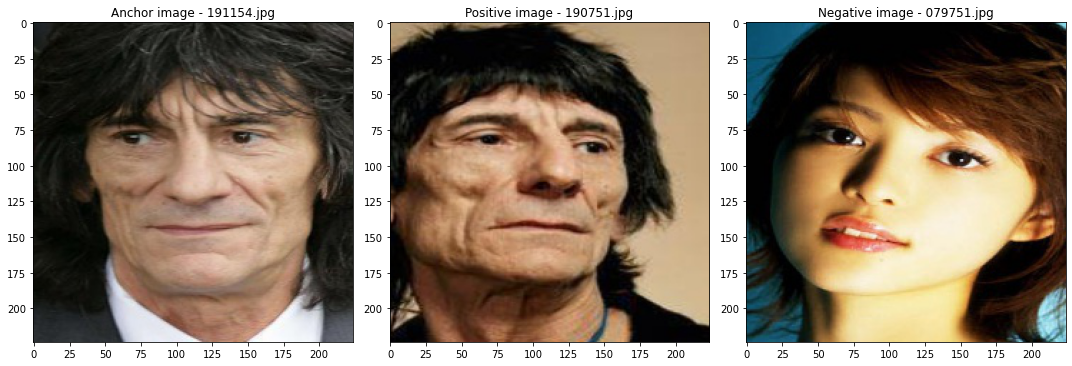

In [21]:
PN.plot_pairs(train_pairs, resize = True)

In [22]:
atts[atts['image'].isin(['177309.jpg','168221.jpg'])]

,image,w5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
168220,168221.jpg,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1
177308,177309.jpg,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1


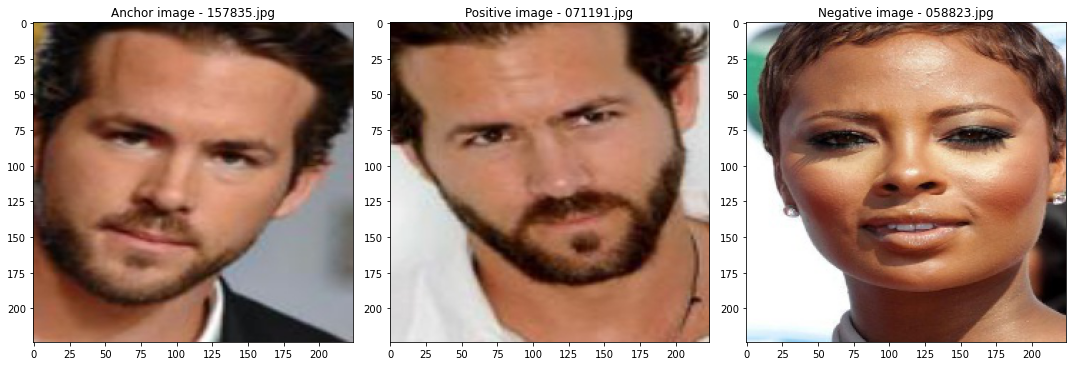

In [23]:
PN.plot_pairs(train_pairs, resize = True)

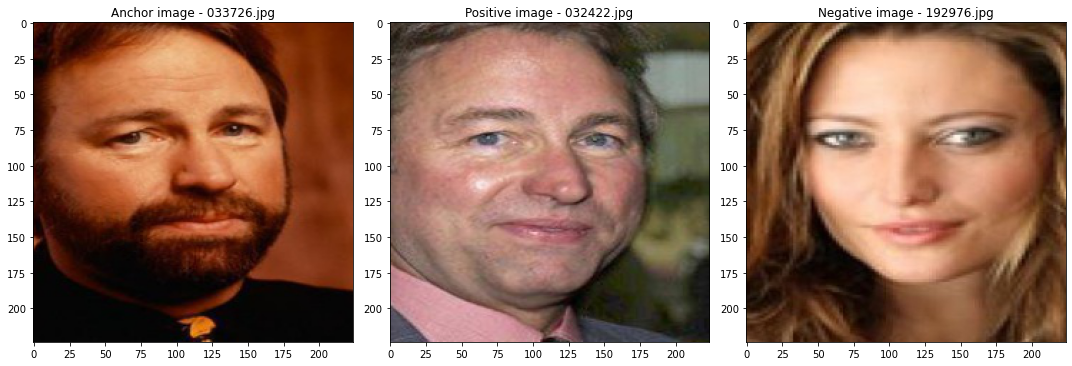

In [24]:
PN.plot_pairs(train_pairs, resize = True)

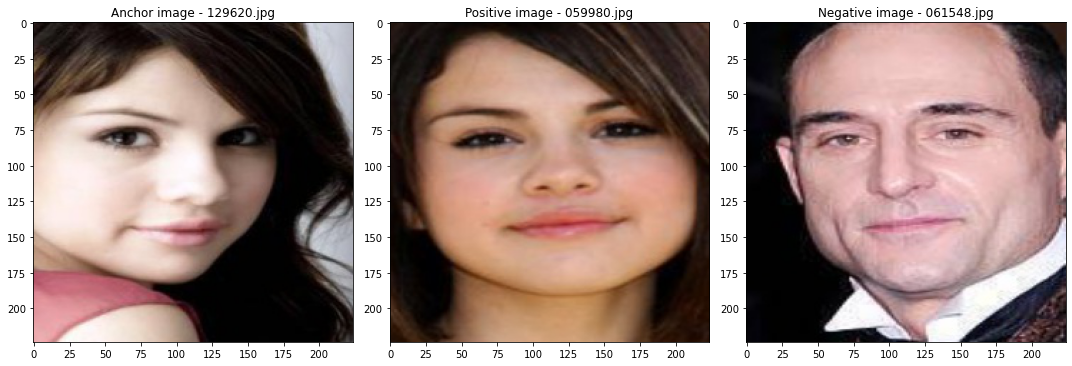

In [25]:
PN.plot_pairs(train_pairs, resize = True)

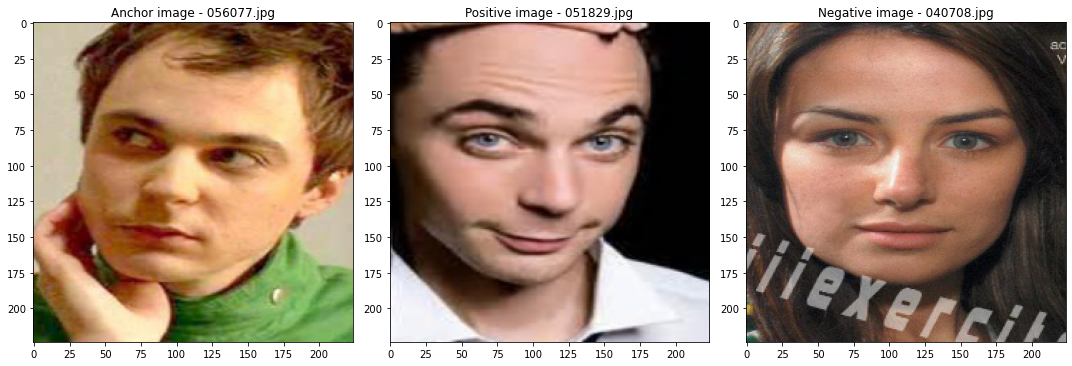

In [26]:
PN.plot_pairs(train_pairs, resize = True)

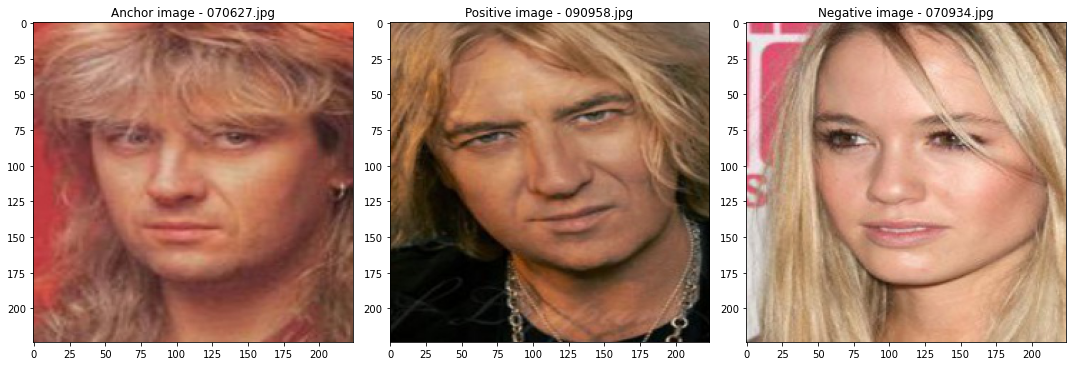

In [27]:
PN.plot_pairs(train_pairs, resize = True)